### CUSTOMER CHURN PREDICTION USING ENSEMBLE LEARNING UNDER MACHINE LEARNING

### IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb





### EXPLORATORY DATA ANALYSIS

### GET THE DATA

In [2]:
df=pd.read_csv('customer churn C.zip')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [3]:
### FIRST 5 ROWS OF THE DATA

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
### LAST 5 ROWS OF THE DATA SEEN

df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [5]:
### CHECKING THE SHAPE OF THE DATA

df.shape

(64374, 12)

In [6]:
### GETTING ALL THE NAME OF THE COLUMNS


df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [7]:
### FETCHING THE ENTIRE INFORMATION ABOUT THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [8]:
### DESCRIPTION OF THE WHOLE DATASET

df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [9]:
### CHECKING THE UNIQUE VALUES OF THE DEPENDENT VARIABLE

df['Churn'].unique()

array([1, 0], dtype=int64)

In [10]:
### CHECKING THE NUMBER OF UNIQUE VALUES

df['Churn'].nunique()

2

In [11]:
### CHECKING THE DATATYPES OF EACH COLUMNS

df.dtypes

CustomerID            int64
Age                   int64
Gender               object
Tenure                int64
Usage Frequency       int64
Support Calls         int64
Payment Delay         int64
Subscription Type    object
Contract Length      object
Total Spend           int64
Last Interaction      int64
Churn                 int64
dtype: object

In [12]:
### CHECKING WHETHER THERE IS ANY MISSING VALUES 


df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [13]:
### SO, AS WE CAN SEE THAT THERE ARE NO NULL VALUES IN THE DATASET

In [14]:
### HENCE, WE MOVE FURTHER FOR MORE EDA 

In [15]:
### RENAMING THE COLUMNS WITH A LARGER NAME TO MAKE IT SIMPLE


df.rename(columns={'Usage Frequency':'Usefreq', 'Support Calls':'Suppcals', 'Payment Delay':'Paydel', 'Subscription Type':
                   'Subtype', 'Contract Length':'Conlen', 'Total Spend':'Totspend','Last Interaction':'Lastint'}, inplace=
         True)

df

,CustomerID,Age,Gender,Tenure,Usefreq,Suppcals,Paydel,Subtype,Conlen,Totspend,Lastint,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [16]:
### DROPPING THE COLUMN CUSTOMERID AS IT DOES NOT REQUIRE


df.drop('CustomerID', axis=1, inplace=True)
df

,Age,Gender,Tenure,Usefreq,Suppcals,Paydel,Subtype,Conlen,Totspend,Lastint,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,50,Female,18,19,7,22,Standard,Monthly,540,13,1


In [17]:
### 1. CHECKING THE TOTAL SPEND OF FEMALE AND MALE, WHICH HAS THE HIGHEST AVERAGE TOTAL SPEND ?


df.groupby('Gender')['Totspend'].mean()

Gender
Female    533.869065
Male      549.210053
Name: Totspend, dtype: float64

In [18]:
### SO, WE CAN SAY THAT MALE HAS THE HIGHEST AVERAGE TOTAL SPEND THAN THE FEMALE

In [19]:
### 2. CHECKING THE AVERAGE AGE OF PEOPLE UNDER EACH SUBSCRIPTION TYPE


df.groupby('Subtype')['Age'].mean()

Subtype
Basic       41.939770
Premium     41.880631
Standard    42.092131
Name: Age, dtype: float64

In [20]:
### SO THE AVERAGE AGE IS HIGHEST IN THE STANDARD SUBSCRIPTION TYPE

In [21]:
### 3. BETWEEN MALES AND FEMALES WHO HAS THE HIGHEST PAYMENT DELAYS ?



df.groupby('Gender')['Paydel'].mean()

Gender
Female    17.618694
Male      16.579261
Name: Paydel, dtype: float64

In [22]:
### AS WE CAN SEE THAT FEMALES ARE HAVING HIGHEST PAYEMENT DELAYS THAT MALE

In [23]:
### 4. BETWEEN MALE AND FEMALE WHO HAS CHURNED THE COMPANY MOST?


df.groupby('Gender')['Churn'].sum()

Gender
Female    18911
Male      11582
Name: Churn, dtype: int64

In [24]:
### AS WE CAN SEE THAT FEMALES HAVE CHURNED THE COMPANY MORE THAN THE MALES

In [25]:
### 5. CHECKING THE TOTAL COUNT OF CHURNED AND NOT-CHURNED

df['Churn'].value_counts()

0    33881
1    30493
Name: Churn, dtype: int64

In [26]:
### 6. COMPARING THE COUNT OF MALE AND FEMALE BASED ON THEIR SUBSCRIPTION TYPE


df.groupby('Subtype')['Gender'].value_counts()

Subtype   Gender
Basic     Female    11533
          Male       9918
Premium   Female    11427
          Male       9994
Standard  Female    11393
          Male      10109
Name: Gender, dtype: int64

In [27]:
### SO AS WE CAN SEE THAT UNDER EVERY SUBSCRIPTION TYPE THE COUNT OF FEMALES ARE MORE THAN THOSE OF MALES

In [28]:
### 7. COMPARING BETWEEN MALE AND FEMALE BASED ON THEIR CONTRACT LENGTH


df.groupby('Conlen')['Gender'].value_counts()

Conlen     Gender
Annual     Female    11090
           Male      10320
Monthly    Female    12248
           Male       9882
Quarterly  Female    11015
           Male       9819
Name: Gender, dtype: int64

In [29]:
### HERE WE CAN SEE THAT THE FEMALES HAVE HIGHER CONTRACT LENGTH UNDER EACH CATEGORY THAN THOSE OF MALES

In [30]:
### 8. CHECKING THE AVERAGE AGE OF MALES AND FEMALES



df.groupby('Conlen')['Age'].mean()

Conlen
Annual       41.956376
Monthly      41.996204
Quarterly    41.959201
Name: Age, dtype: float64

In [31]:
### THE AVERAGE AGE IS MORE OR LESS SAME IN EVERY CONTRACT LENGTHS

In [32]:
### 9. WHAT IS THE PERCENTAGE OF MALES AND FEMALES WHO HAVE CHURNED THE COMPANY?

df.groupby('Gender')['Churn'].sum()/len(df)*100

Gender
Female    29.376767
Male      17.991736
Name: Churn, dtype: float64

In [33]:
### SO, HERE THE PERCENTAGE SHOWS THAT THE PERCENTAGE OF FEMALES ARE HIGHER THAN THE MALES

In [34]:
### 10. WHAT IS THE MAXIMUM SUPPORT CALLS OF THE CUSTOMERS IN THE DATASET?


df['Suppcals'].max()

10

In [35]:
### 11. OUT OF THE FEMALES AND MALES , WHO HAS THE HIGHEST LAST INTERACTIONS ?


df.groupby('Gender')['Lastint'].count()

Gender
Female    34353
Male      30021
Name: Lastint, dtype: int64

In [36]:
### AS WE CAN SEE THAT THE FEMALES HAVE INTERACTED LAST MORE THAN THAT OF MALES

In [37]:
### 12. CHECKING THE AVERAGE TENURE OF MALE AND FEMALE?

df.groupby('Gender')['Tenure'].mean()

Gender
Female    31.524612
Male      32.532894
Name: Tenure, dtype: float64

In [38]:
### SO HERE THE AVERAGE TENURE  OF MALE IS MORE THAN THAT OF FEMALES

In [39]:
#### =>> DATA VISUALISATION

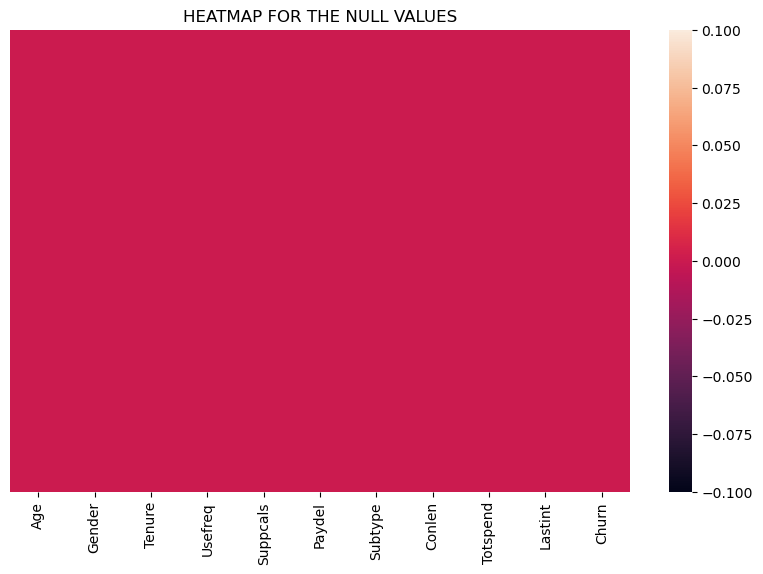

In [40]:
### 1. CHECKING THE NULL VALUES THROUGH HEATMAP


plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), yticklabels=False)
plt.title('HEATMAP FOR THE NULL VALUES')
plt.show()

In [41]:
### SO, AS WE CAN SEE THAT THERE IS NO NULL VALUES

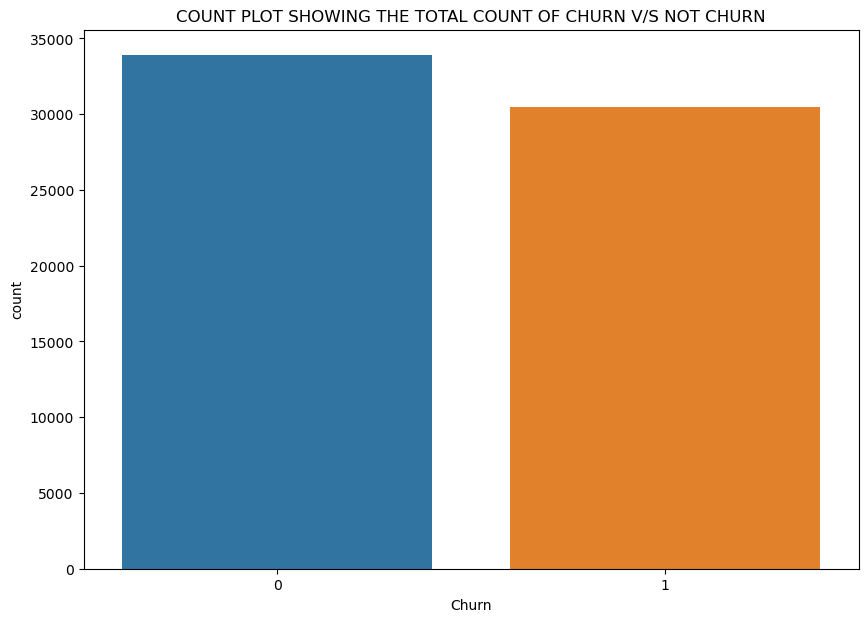

In [42]:
### 2. CHECKING THE TOTAL COUNT OF CHURN AND NOT CHURN THROUGH A COUNTPLOT


plt.figure(figsize=(10,7))
sns.countplot(df, x='Churn')
plt.title('COUNT PLOT SHOWING THE TOTAL COUNT OF CHURN V/S NOT CHURN')
plt.show()

In [43]:
### AS WE CAN SEE THAT THE PEOPLE WHO ARE NOT-CHURNED IS MORE IN NUMBER THAN THOSE WHO HAVE CHURNED

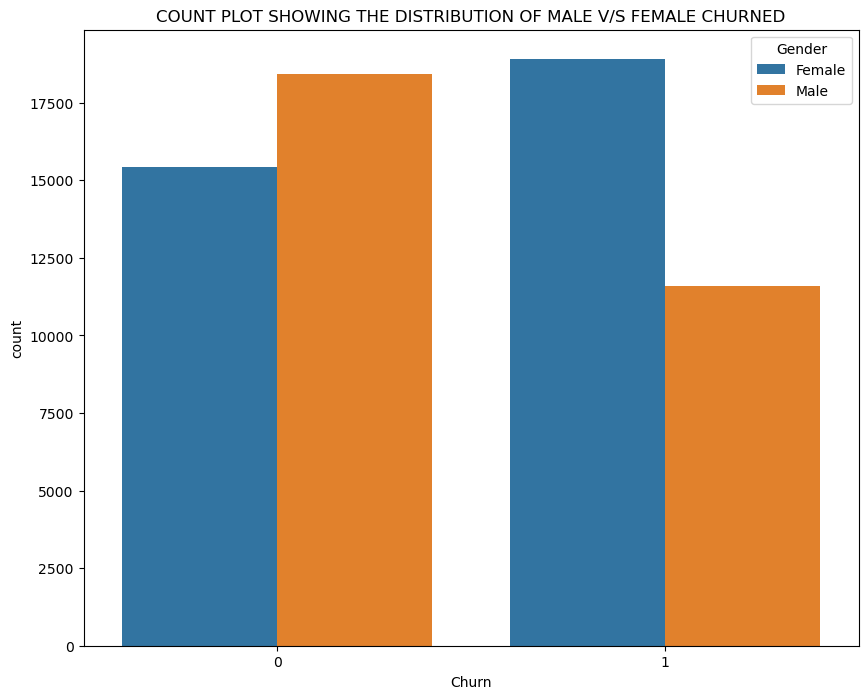

In [44]:
### 3. CHECKING OUT OF MALE AND FEMALE WHO HAVE CHURNED MORE


plt.figure(figsize=(10,8))
sns.countplot(df, x='Churn', hue='Gender')
plt.title('COUNT PLOT SHOWING THE DISTRIBUTION OF MALE V/S FEMALE CHURNED')
plt.show()

In [45]:
### AS WE CAN SEE THAT THE FEMALE HAVE CHURNED MORE THAN THE MALE

In [46]:
### 4. CORRELATION MATRIX


df_cor= df.corr()
df_cor

,Age,Tenure,Usefreq,Suppcals,Paydel,Totspend,Lastint,Churn
Age,1.000000,-0.007763,-0.038331,0.005014,-0.016132,0.006490,-0.000148,0.063457
Tenure,-0.007763,1.000000,0.023485,0.060065,0.055963,0.009474,0.005770,0.195327
Usefreq,-0.038331,0.023485,1.000000,-0.014072,0.031132,0.001527,-0.009192,-0.115098
Suppcals,0.005014,0.060065,-0.014072,1.000000,0.064298,0.021750,0.001666,0.304631
Paydel,-0.016132,0.055963,0.031132,0.064298,1.000000,-0.031119,-0.008076,0.557386
Totspend,0.006490,0.009474,0.001527,0.021750,-0.031119,1.000000,-0.007692,-0.078867
Lastint,-0.000148,0.005770,-0.009192,0.001666,-0.008076,-0.007692,1.000000,-0.002818
Churn,0.063457,0.195327,-0.115098,0.304631,0.557386,-0.078867,-0.002818,1.000000


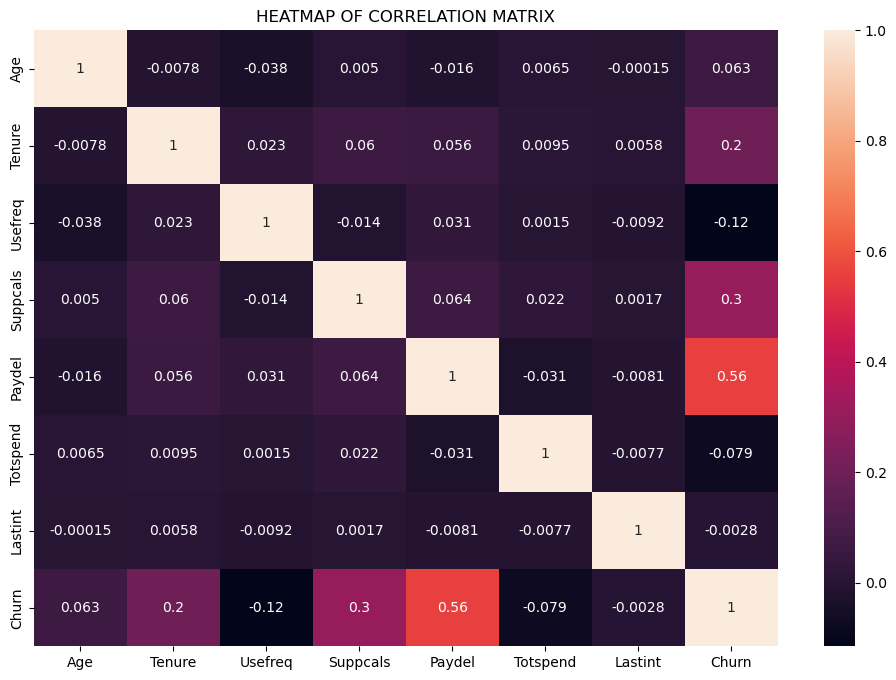

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cor, annot=True)
plt.title('HEATMAP OF CORRELATION MATRIX')
plt.show()

In [48]:
### SO FROM ABOVE WE CAN SAY THAT THE PAYMENT DELAYS IS HAVING A STRONG POSITIVE CORRELATION WITH CHURN (TARGET VARIABLE) 
### AND ALSO THE SUPPORT CALLS AND THE TENURE IS HAVING A POSITIVE CORRELATION WITH THE CHURN (TARGET VARIABLE). 

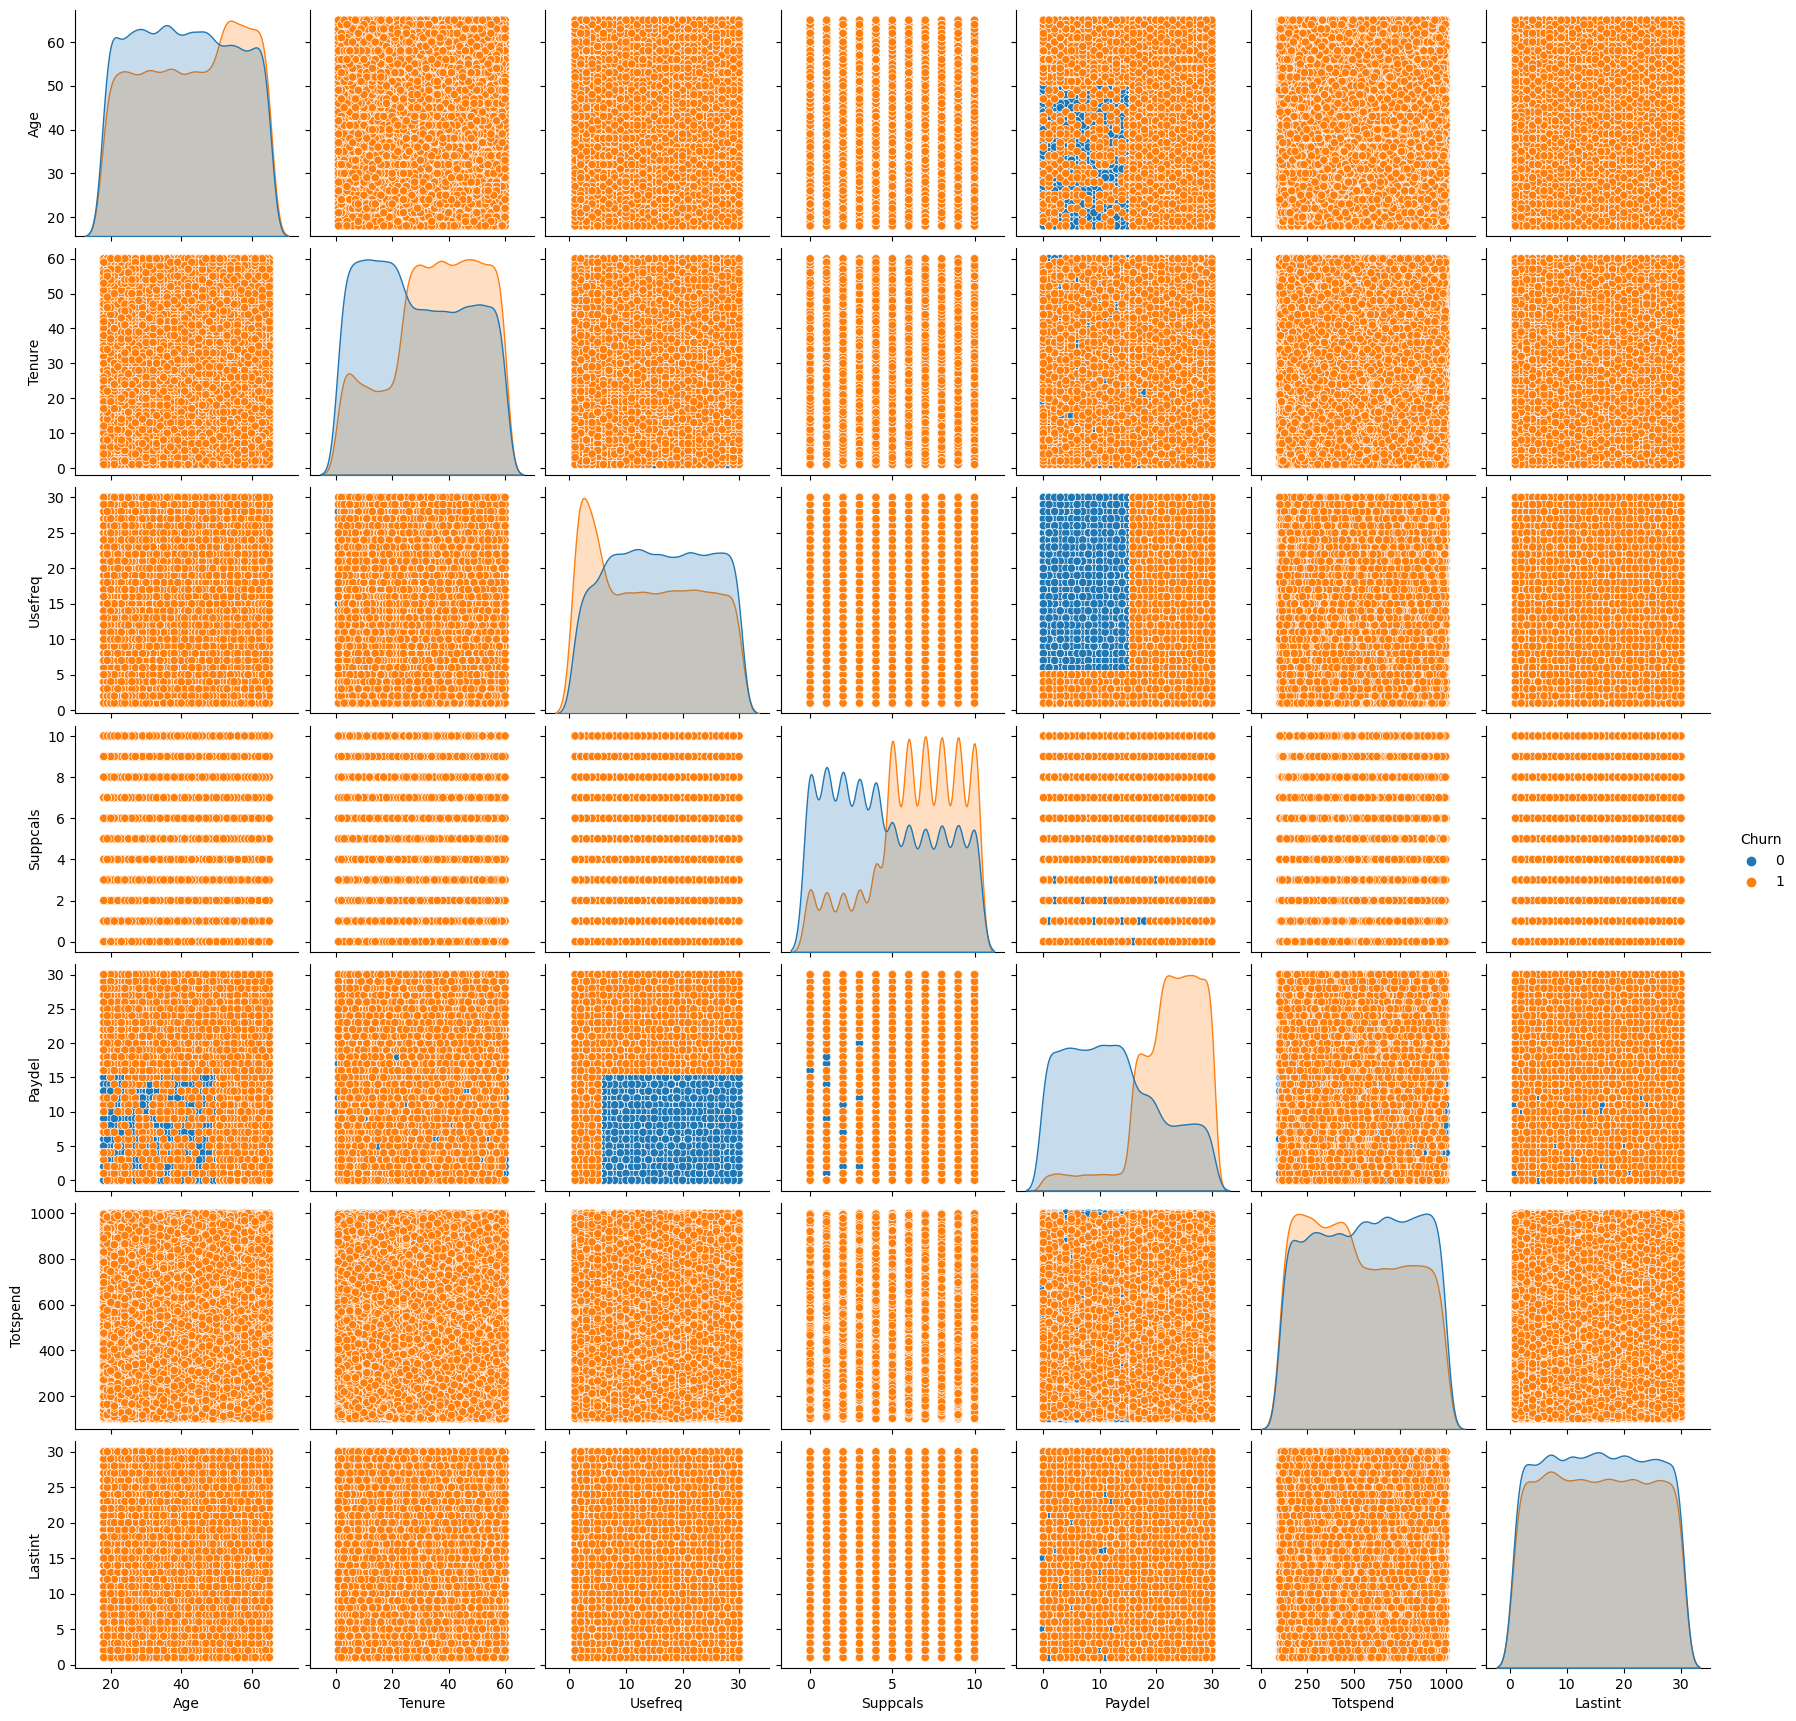

In [49]:
### 5. SHOWING THE RELATION BETWEEN EACH INDEPENDENT VARIABLE PAIR WISE IN A SCATTER PLOT MATRIX


sns.pairplot(df, hue='Churn')
plt.show()

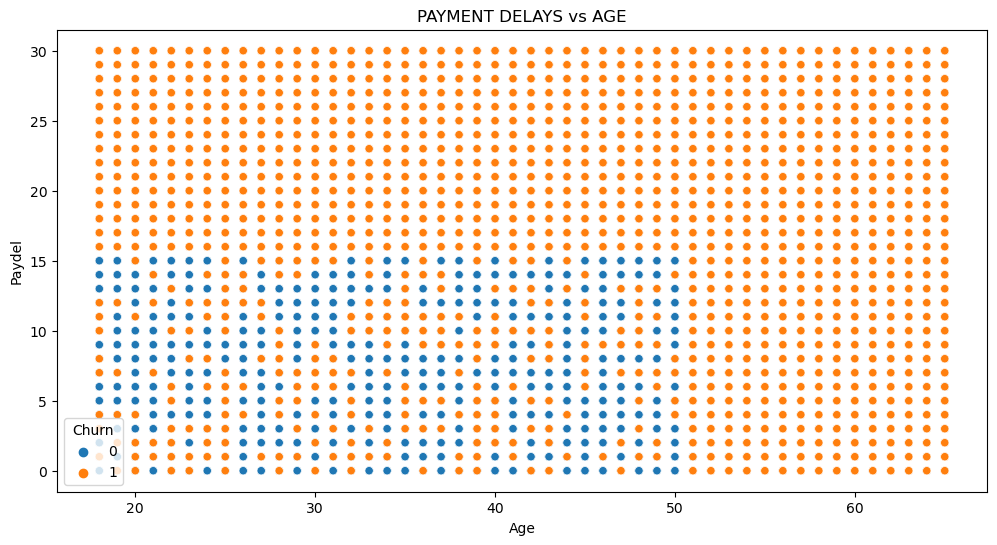

In [50]:
### 6. SHOWING THE CORRELATION BETWEEN PAYMENT DELAYS WITH THE AGE BASED ON CHURN


plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x= 'Age', y='Paydel', hue='Churn')
plt.title('PAYMENT DELAYS vs AGE')
plt.show()


In [51]:
### AS WE CAN SEE THAT THERE IS NO CORRELATION BETWEEN PAYMENT DELAYS AND THE AGE 

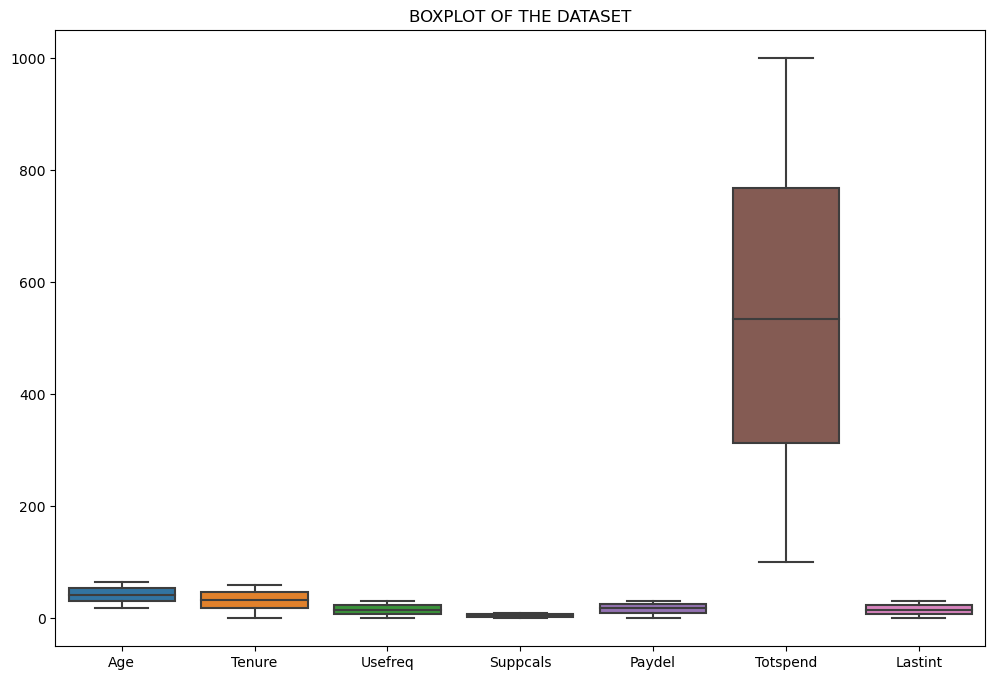

In [52]:
### 7. VISUALISING WHETHER THERE IS ANY OUTLIERS OR NOT AND THE STATISTICAL INFERENCES

plt.figure(figsize=(12,8))
sns.boxplot(data=df.drop('Churn',axis=1))
plt.title('BOXPLOT OF THE DATASET')
plt.show()

In [53]:
### AS WE CAN SEE THAT THERE IS NO OUTLIERS AS WELL AND ALSO IT INTERPRETS THAT THE STATISTICAL INFERENCES OF THE 
### TOTAL SPEND IS THE HIGHEST  AND THE SUPPORT CALLS IS THE LOWEST IN THE DATA

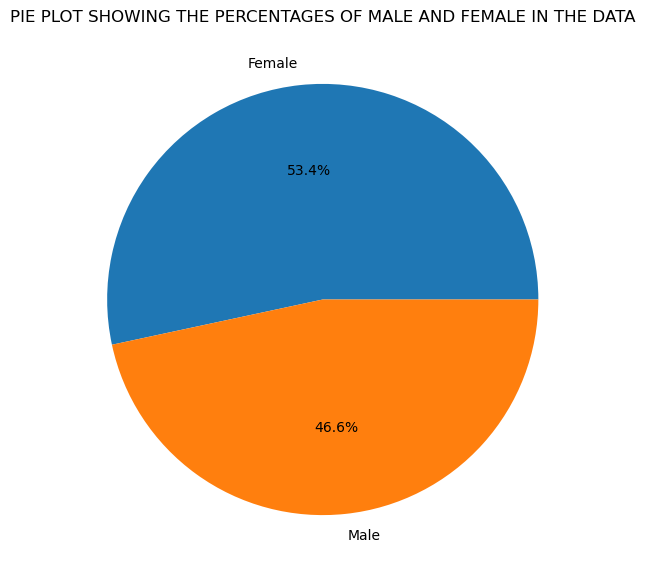

In [54]:
### 8. PERCENTAGES OF MALE vs FEMALE IN THE DATA 

plt.figure(figsize=(10,7))
gend= df['Gender'].value_counts()
plt.pie(gend.values, labels= gend.index, autopct='%1.1f%%')
plt.title ('PIE PLOT SHOWING THE PERCENTAGES OF MALE AND FEMALE IN THE DATA')
plt.show()


In [55]:
### SO AS WE CAN SEE THAT THE PERCENTAGE OF FEMALES ARE HIGHER THAN THE MALES IN THE DATASET WHICH IS 53.4%

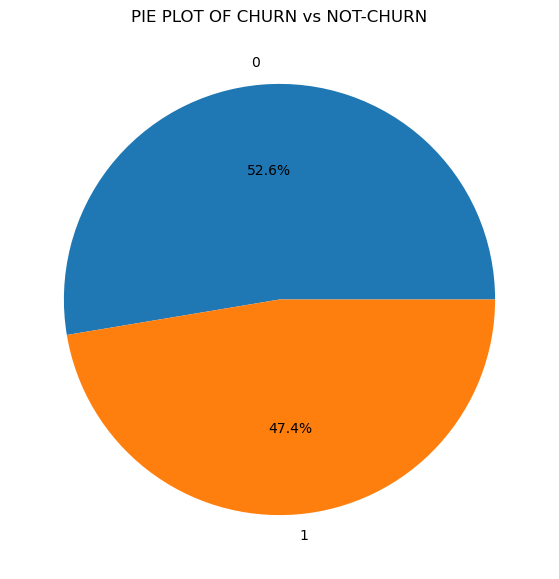

In [56]:
### 9.  PERCENTAGES OF CHURN vs NOT-CHURN

churned= df['Churn'].value_counts()
plt.figure(figsize=(10,7))
plt.pie(churned.values, labels= churned.index, autopct='%1.1f%%')
plt.title('PIE PLOT OF CHURN vs NOT-CHURN')
plt.show()

In [57]:
### SO HERE WE CAN SEE THAT THE PERCENTAGE OF NOT CHURN IS MORE THAN THAT OF CHURN IN THE DATA WHICH IS 52.6%

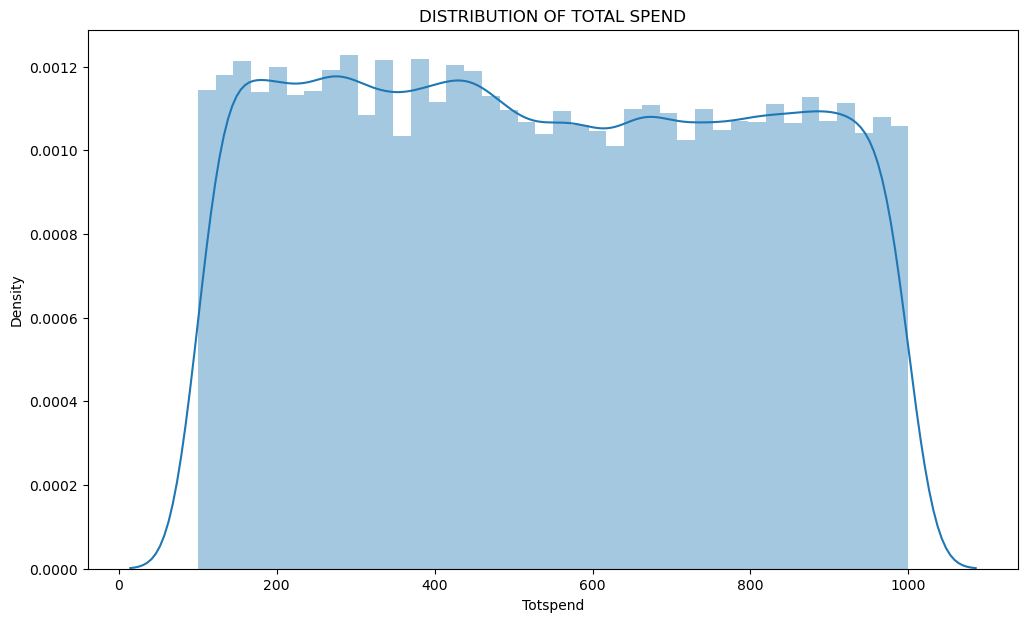

In [58]:
### 10. DISTRIBUTION OF TOTAL SPEND OF CUSTOMERS 

plt.figure(figsize=(12,7))
sns.distplot(df['Totspend'])
plt.title ('DISTRIBUTION OF TOTAL SPEND')
plt.show()

In [59]:
### ITS NOT NORMAL DISTRIBUTION

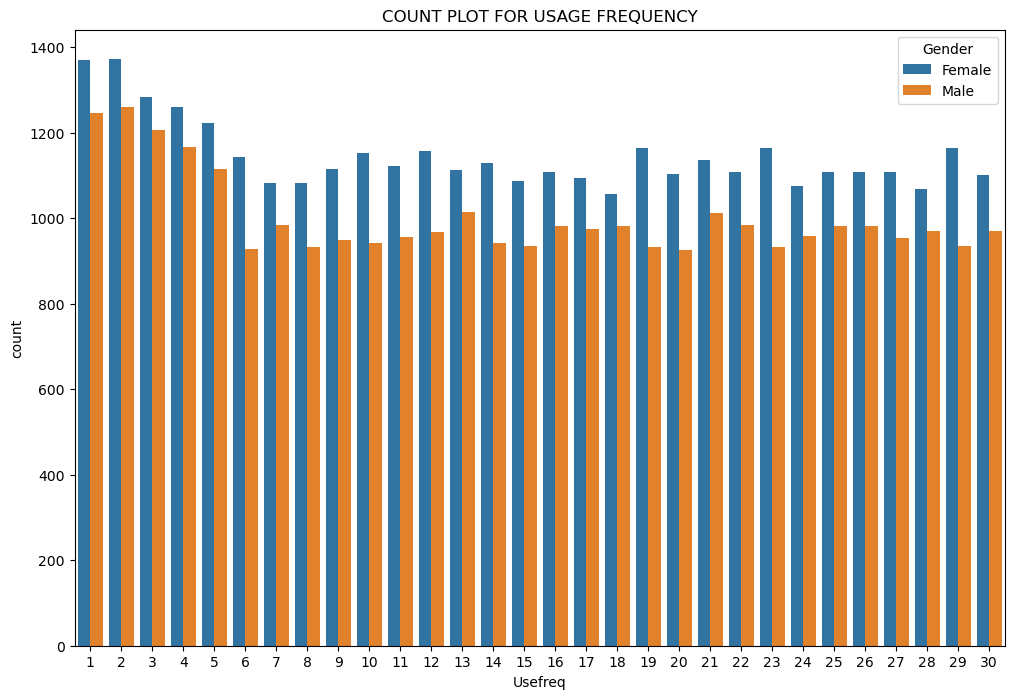

In [60]:
### 11. WHICH USAGE FREQUENCY HAS THE HIGHEST COUNT IN THE DATA?

plt.figure(figsize=(12,8))
sns.countplot(x='Usefreq',hue='Gender', data=df)
plt.title('COUNT PLOT FOR USAGE FREQUENCY')
plt.show()

In [61]:
### SO , AS WE CAN SEE THAT THE FEMALE USAGE FREQUENCY OF 2 IS THE HIGHER THAN THE MALE 

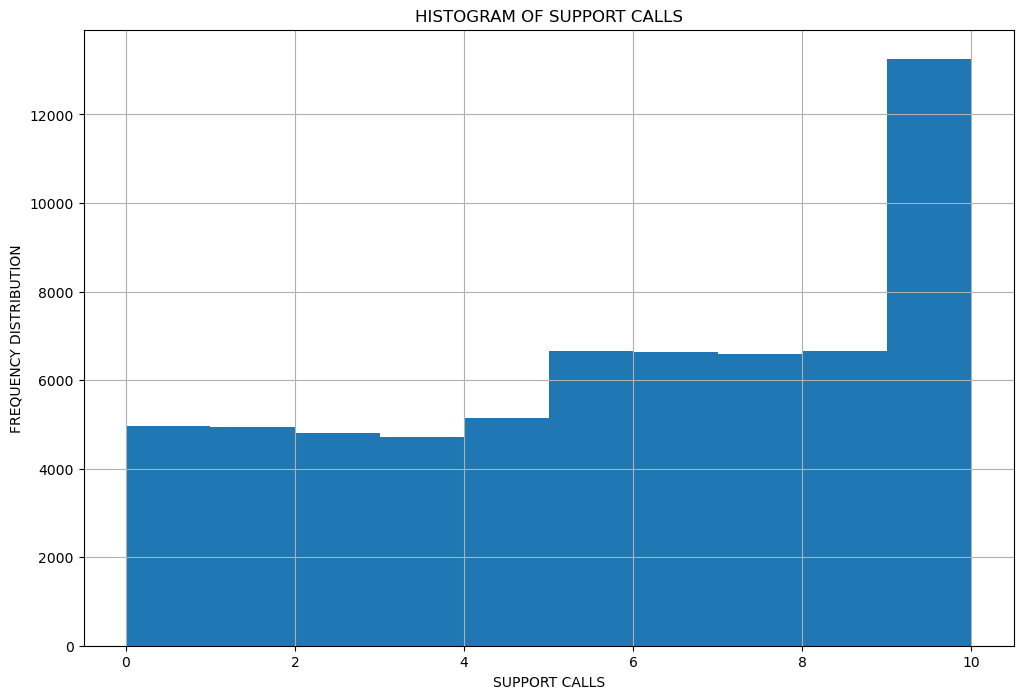

In [62]:
### 12. HISTOGRAM SHOWING THE FREQUENCY DISTRIBUTION OF THE SUPPORT CALLS


plt.figure(figsize=(12,8))
df['Suppcals'].hist(bins=10)
plt.title('HISTOGRAM OF SUPPORT CALLS')
plt.xlabel('SUPPORT CALLS')
plt.ylabel('FREQUENCY DISTRIBUTION')
plt.show()

In [63]:
### HERE WE CAN SAY THAT THE SUPPORT CALLS WITHIN THE INTERVAL  9-10  HAS THE HIGHEST FREQUENCY IN THE DATA

### PREPOCESSING

In [65]:
### 1. CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA

encoder=LabelEncoder()

In [66]:
df['Gender']=encoder.fit_transform(df['Gender'])
df['Subtype']= encoder.fit_transform(df['Subtype'])
df['Conlen'] = encoder.fit_transform(df['Conlen'])
df

,Age,Gender,Tenure,Usefreq,Suppcals,Paydel,Subtype,Conlen,Totspend,Lastint,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0
...,...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14,1
64370,37,1,6,1,5,22,2,0,923,9,1
64371,25,1,39,14,8,30,1,1,327,20,1
64372,50,0,18,19,7,22,2,1,540,13,1


In [67]:
df.head(15)

,Age,Gender,Tenure,Usefreq,Suppcals,Paydel,Subtype,Conlen,Totspend,Lastint,Churn
0,22,0,25,14,4,27,0,1,598,9,1
1,41,0,28,28,7,13,2,1,584,20,0
2,47,1,27,10,2,29,1,0,757,21,0
3,35,1,9,12,5,17,1,2,232,18,0
4,53,0,58,24,9,2,2,0,533,18,0
5,30,1,41,14,10,10,1,1,500,29,0
6,47,0,37,15,9,28,0,2,574,14,1
7,54,0,36,11,0,18,2,1,323,16,0
8,36,1,20,5,10,8,0,1,687,8,0
9,65,1,8,4,2,23,0,0,995,10,0


In [68]:
### 2. SPLITTING INTO X AND Y

x= df.drop('Churn', axis=1)
y=df['Churn']

In [69]:
x

,Age,Gender,Tenure,Usefreq,Suppcals,Paydel,Subtype,Conlen,Totspend,Lastint
0,22,0,25,14,4,27,0,1,598,9
1,41,0,28,28,7,13,2,1,584,20
2,47,1,27,10,2,29,1,0,757,21
3,35,1,9,12,5,17,1,2,232,18
4,53,0,58,24,9,2,2,0,533,18
...,...,...,...,...,...,...,...,...,...,...
64369,45,0,33,12,6,21,0,2,947,14
64370,37,1,6,1,5,22,2,0,923,9
64371,25,1,39,14,8,30,1,1,327,20
64372,50,0,18,19,7,22,2,1,540,13


In [70]:
x.shape

(64374, 10)

In [71]:
y

0        1
1        0
2        0
3        0
4        0
        ..
64369    1
64370    1
64371    1
64372    1
64373    1
Name: Churn, Length: 64374, dtype: int64

In [72]:
y.shape

(64374,)

In [73]:
x.head()

,Age,Gender,Tenure,Usefreq,Suppcals,Paydel,Subtype,Conlen,Totspend,Lastint
0,22,0,25,14,4,27,0,1,598,9
1,41,0,28,28,7,13,2,1,584,20
2,47,1,27,10,2,29,1,0,757,21
3,35,1,9,12,5,17,1,2,232,18
4,53,0,58,24,9,2,2,0,533,18


In [74]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

In [75]:
### 3. SCALING THE FEATURES USING STANDARD SCALER 

scaler = StandardScaler()

In [76]:
x_scaled= scaler.fit_transform(x)
x_scaled

array([[-1.43420211, -0.93482484, -0.40909964, ...,  0.01104616,
         0.21840769, -0.75232377],
       [-0.0697304 , -0.93482484, -0.23364156, ...,  0.01104616,
         0.16474168,  0.52106473],
       [ 0.36115541,  1.06971912, -0.29212759, ..., -1.22347696,
         0.82790017,  0.63682733],
       ...,
       [-1.21875921,  1.06971912,  0.40970473, ...,  0.01104616,
        -0.82041283,  0.52106473],
       [ 0.57659831, -0.93482484, -0.81850183, ...,  0.01104616,
        -0.0039229 , -0.28927341],
       [ 0.72022691, -0.93482484,  0.76062088, ...,  0.01104616,
         0.59406972,  0.75258992]])

In [77]:
### 4. CONTROL THE RANDOMNESS OF THE SPLIT

np.random.seed(42)

In [78]:
### TRAIN-TEST-SPLIT


x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [79]:
print(x_train.shape, y_train.shape)

(51499, 10) (51499,)


In [80]:
print(x_test.shape, y_test.shape)

(12875, 10) (12875,)


### MODEL BUILDING

In [82]:
### 1. LOGISTIC REGRESSION

lr= LogisticRegression()

In [83]:
### FITTING THE MODEL

lr.fit(x_train, y_train)

LogisticRegression()

In [84]:
### PREDICTING THE MODEL PERFORMANCE


lr_pred= lr.predict(x_test)

In [85]:
lr_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [86]:
### EVALUATION OF THE MODEL PERFORMANCE WITH ACTUAL TEST


### CONFUSION MATRIX


coml= confusion_matrix(y_test, lr_pred)
coml



array([[5639, 1154],
       [1027, 5055]], dtype=int64)

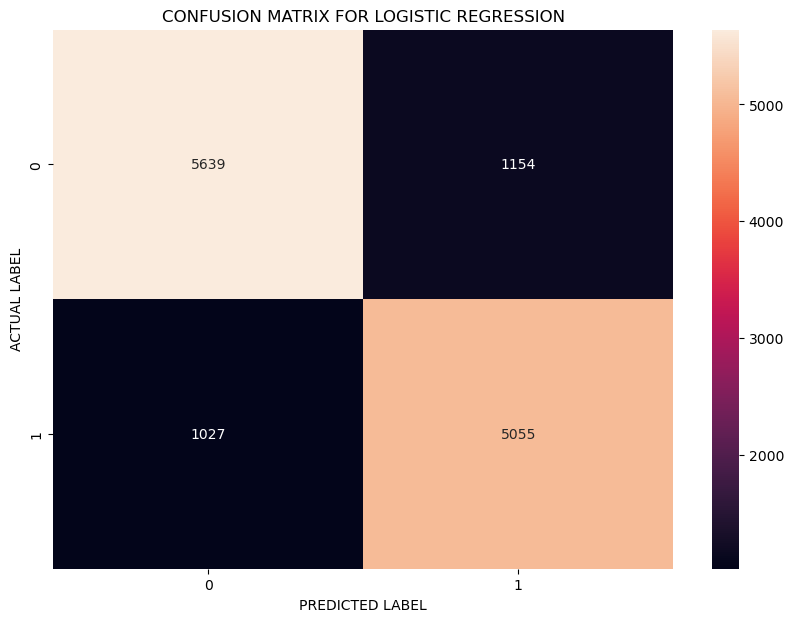

In [87]:
### VISUALISING THE CONFUSION MATRIX


plt.figure(figsize=(10,7))
sns.heatmap(coml, annot=True, fmt='g')
plt.title('CONFUSION MATRIX FOR LOGISTIC REGRESSION')
plt.xlabel('PREDICTED LABEL')
plt.ylabel('ACTUAL LABEL')
plt.show()

In [88]:
### CLASSIFICATION REPORT

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      6793
           1       0.81      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



In [89]:
### 2. RANDOM FOREST CLASSIFIER

rf= RandomForestClassifier()

In [90]:
### TRAINING THE MODEL

rf.fit(x_train, y_train)

RandomForestClassifier()

In [91]:
### TESTING THE MODEL

rf_pred= rf.predict(x_test)
rf_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [92]:
### EVALUATING THE PERFORMANCE OF THE MODEL 


### CONFUSION MATRIX

com_rf= confusion_matrix(y_test, rf_pred)
com_rf

array([[6792,    1],
       [   7, 6075]], dtype=int64)

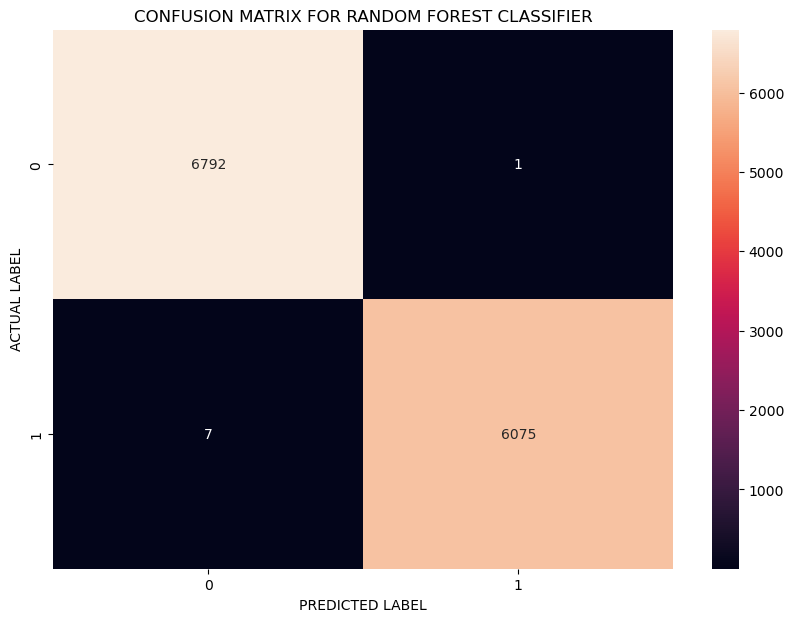

In [93]:
### VISUALISE THE CONFUSION MATRIX

plt.figure(figsize=(10,7))
sns.heatmap(com_rf, annot=True, fmt='g')
plt.title('CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER')
plt.xlabel('PREDICTED LABEL')
plt.ylabel('ACTUAL LABEL')
plt.show()

In [94]:
### CLASSIFICATION REPORT 

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [95]:
### 3. XGBOOST CLASSIFIER

xgcl= xgb.XGBClassifier()

In [96]:
### FITTING THE MODEL

xgcl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [97]:
### TESTING THE MODEL 


xg_pred= xgcl.predict(x_test)
xg_pred

array([0, 0, 1, ..., 1, 0, 0])

In [98]:
### EVALUATION OF THE MODEL


### CONFUSION MATRIX 

con_xg= confusion_matrix(y_test, xg_pred)
con_xg

array([[6793,    0],
       [   0, 6082]], dtype=int64)

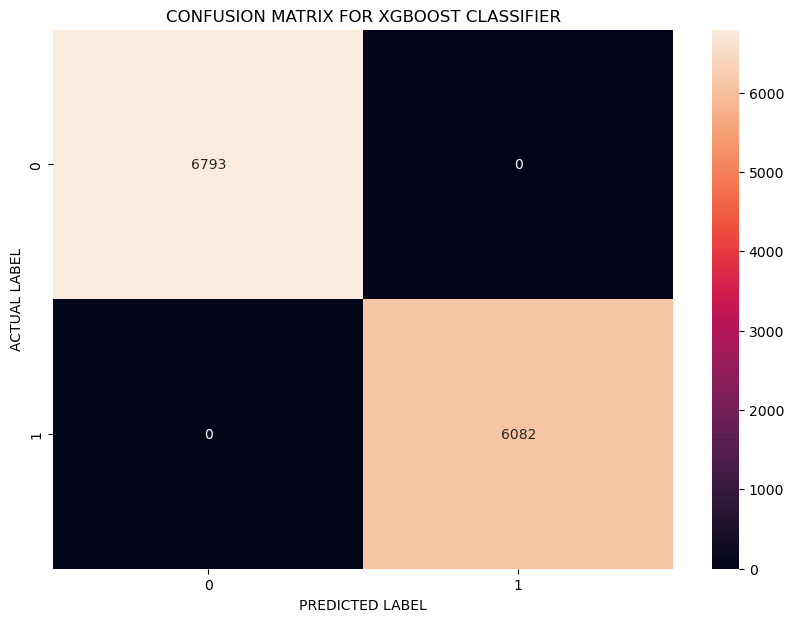

In [99]:
### VISUALISING THE CONFUSION MATRIX


plt.figure(figsize=(10,7))
sns.heatmap(con_xg, annot=True, fmt='g')
plt.title('CONFUSION MATRIX FOR XGBOOST CLASSIFIER')
plt.xlabel('PREDICTED LABEL')
plt.ylabel('ACTUAL LABEL')
plt.show()

In [100]:
### CLASSIFICATION REPORT

print(classification_report(y_test, xg_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875



In [101]:
### FEATURE IMPORTANCES PLOT

In [102]:
impor= rf.feature_importances_

In [103]:
df_imp=pd.DataFrame({'Feature':x.columns, 'Importance':impor})

In [104]:
df_imp

,Feature,Importance
0,Age,0.038913
1,Gender,0.075394
2,Tenure,0.110662
3,Usefreq,0.088038
4,Suppcals,0.156691
5,Paydel,0.436948
6,Subtype,0.003150
7,Conlen,0.041771
8,Totspend,0.041748
9,Lastint,0.006685


In [105]:
df_imp=df_imp.sort_values('Importance', ascending=False)
df_imp

,Feature,Importance
5,Paydel,0.436948
4,Suppcals,0.156691
2,Tenure,0.110662
3,Usefreq,0.088038
1,Gender,0.075394
7,Conlen,0.041771
8,Totspend,0.041748
0,Age,0.038913
9,Lastint,0.006685
6,Subtype,0.003150


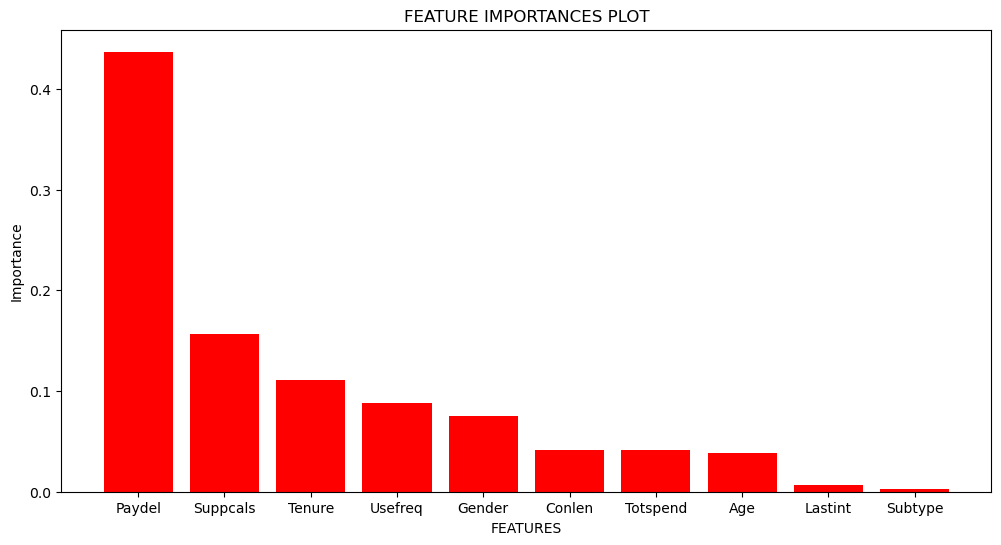

In [109]:
### PLOTTING THE FEATURE IMPORTANCES IN A BAR PLOT



plt.figure(figsize=(12,6))
plt.bar(df_imp['Feature'], df_imp['Importance'], color='red')
plt.title('FEATURE IMPORTANCES PLOT')
plt.xlabel('FEATURES')
plt.ylabel('Importance')
plt.show()

In [110]:
### CONCLUSION :
 ### AS IT IS A BUSINESS DOMAIN PROBLEM , AND ITS VERY MUCH IMPORTANT TO FOCUS ON THE RECALL SCORES AS IT TELLS US THAT 
### OUT OF THOSE WHO HAD CHURNED THE COMPANY ACTUALLY , HOW MANY OF THEM ARE CORRECTLY PREDICTED BY THE MODEL, OTHERWISE
### THE COMPANY WILL FACE THE LOSS IF THE CUSTOMERS CHURN THE COMPANY .


### TOP 5 FEATURES ARE PAYMENT DELAYS, SUPPORT CALLS, TENURE, USAGE FREQUENCY AND GENDER , PLAYS THE MOST SIGNIFICANT
### ROLE IN PREDICTING THAT A CUSTOMER HAS CHURNED OR NOT CHURNED.


### BEST MODEL IS RANDOM FOREST CLASSIFIER AND XGBOOST CLASSIFIER WITH THE RECALL OF 1.00.